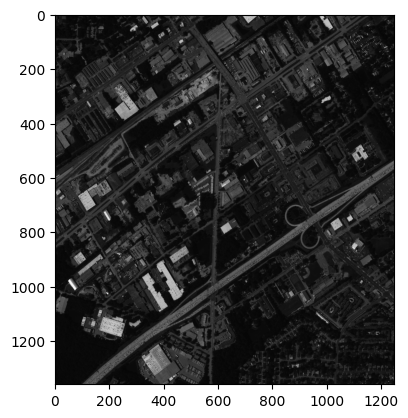

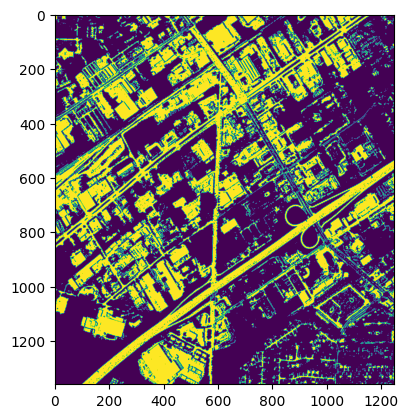

In [1]:
# -*- coding:utf-8 -*-
%matplotlib inline
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# ==============================1.加载并显示=======================
ds = gdal.Open(r"D:\GoogleDownLoads\CasMVSNet_pl\gdal_study\RSP_testing_data\JAX_IMG1_MSI.TIF")  # gdal.Dataset
gt = ds.GetGeoTransform()  # 地理变换：图像到地理坐标的变换矩阵
proj = ds.GetProjection()  # 投影信息

band = ds.GetRasterBand(1)  # 查询波段数：ds.RasterCount
array = band.ReadAsArray()

plt.figure()
plt.imshow(array, cmap='gray')
plt.show()

# =============2.数据操作：过滤高于数据平均值的值，高于赋值为1，否则为0====
binmask = np.where((array >= np.mean(array)), 1, 0)
# 制作二进制掩膜，用于提取影像
plt.figure()
plt.imshow(binmask)
plt.show()

# ==============================3.输出影像==============================
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("binmask.tif",
                      xsize=binmask.shape[1],
                      ysize=binmask.shape[0],
                      bands=1,
                      eType=gdal.GDT_Int16)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(binmask)
outband.SetNoDataValue(np.nan)
outband.FlushCache()

# ==============================4.关闭数据和波========================
outband = None
outds = None
